# Proyek Pertama: Predictive Analytics


---

## Data Diri
Nama: Daffa Albari

Email: daffaa.albari@gmail.com

Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


Reference:


1.   
[Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
2.   [Tree](https://scikit-learn.org/stable/modules/tree.html)
3.  [Forest](https://scikit-learn.org/stable/modules/ensemble.html)


In [1]:
!pip install -q kaggle

# **1. *Library Import***

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org/) untuk melakukan visualisasi menggunakan *plotting*.

In [1]:
%matplotlib inline

from google.colab import files

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, mean_squared_error, f1_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# **2. *Data Loading***

## 2.1 *Kaggle Credential and Dataset Download*

In [ ]:
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

In [3]:
! unzip diabetes-prediction-dataset.zip -d diabetes_prediction

Archive:  diabetes-prediction-dataset.zip
replace diabetes_prediction/diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
path = '/content/diabetes_prediction/diabetes_prediction_dataset.csv'

Menampilkan isi dataset menggunakan pandas

In [7]:
data = pd.read_csv(path)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **3. *Data Understanding***

In [8]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Pada dataset ini terdapat 9 fitur. Fitur diabetas adalah fitur targetnya. Kita akan mempredeksi apakah seseorang terkena dibetes dari 8 fitur tersebut

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Tidak ada missing values pada dataset ini

In [11]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

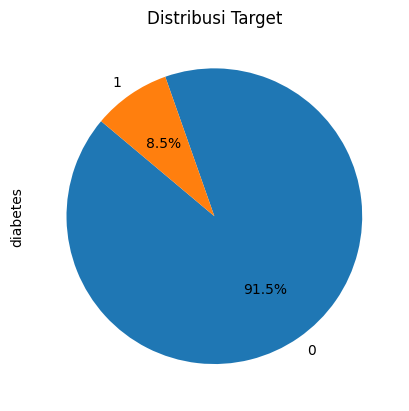

In [12]:
data['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Target')
plt.show()

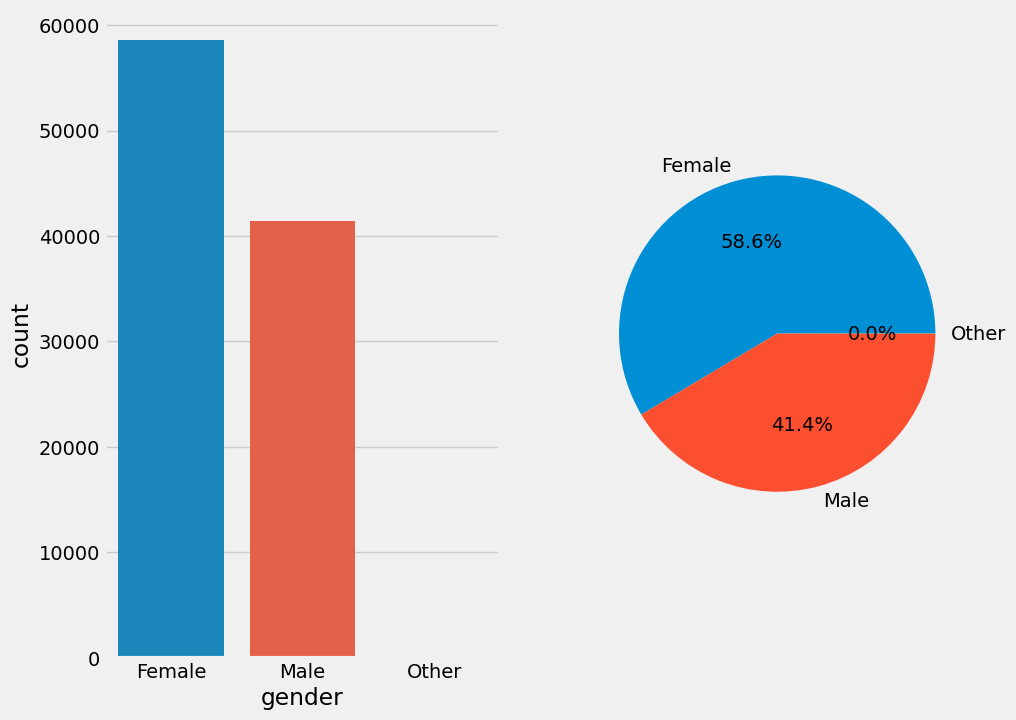

In [13]:
labels = ['Female', 'Male', 'Other']
values = data['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

In [14]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Melihat deskripsi statistik dari *dataframe* `diabetes_prediction` yaitu,
1.   `count` : Jumlah data
2.   `mean` : Rata-rata
3.   `std` : Standar deviasi/simpangan baku
4.   `min` : Nilai minimum
5.   `25%` : Kuartil bawah/Q1
6.   `50%` : Kuartil tengah/Q2/median
7.   `75%` : Kuartil atas/Q3
8.   `max` : Nilai maksimum

In [15]:
data.duplicated().sum()

3854

Ada beberapa data yang duplicated

## Data Cleaning

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(96146, 9)

<Axes: xlabel='blood_glucose_level'>

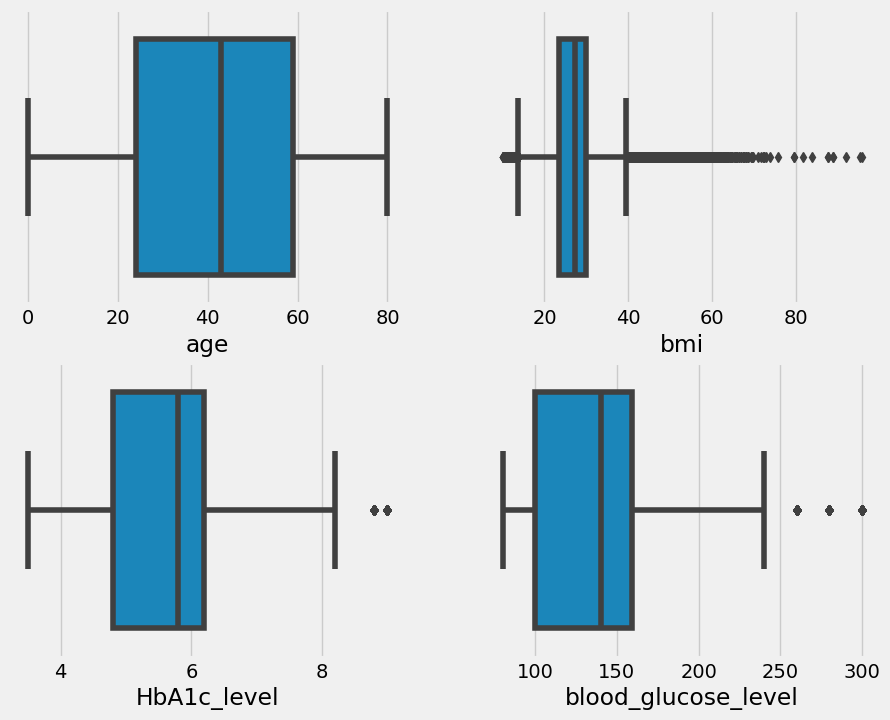

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(ax=axes[0, 0], x=data.age)
sns.boxplot(ax=axes[0, 1], x=data.bmi)
sns.boxplot(ax=axes[1, 0], x=data.HbA1c_level)
sns.boxplot(ax=axes[1, 1], x=data.blood_glucose_level)

Terlihat pada diagram boxplot, terdapat beberapa outlier.

UNtuk mengatasi outlier, dilakukan pendekatan Z-Index.

### Menangani Outlier dengan menggunakan Z-Index

Pengolahan outlier dengan menggunakan z-score atau indeks z adalah salah satu teknik umum yang digunakan untuk mendeteksi dan menangani outlier dalam data. Z-score mengukur sejauh mana setiap titik data berjarak dari rata-rata populasi dalam satuan deviasi standar.

Z_i = (X_i - Mean) / StdDev

Di mana:

*   Z_i adalah z-score untuk titik data ke-i.
*   X_i adalah nilai titik data ke-i.
*   Mean adalah rata-rata (mean) dari seluruh data.
*   StdDev adalah deviasi standar dari seluruh data.

In [55]:
test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

In [20]:
data.shape

(92542, 9)

In [21]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Exploratory Data Analysis - Univariate Analysis

In [22]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

### Categorical Features

In [23]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah sample': count, 'Persentasi':percent.round(1)})
print(df)

        Jumlah sample  Persentasi
Female          54056        58.4
Male            38468        41.6
Other              18         0.0


Jumlah jenisi kelamin other sangat sedikit

<Axes: title={'center': 'Feature'}>

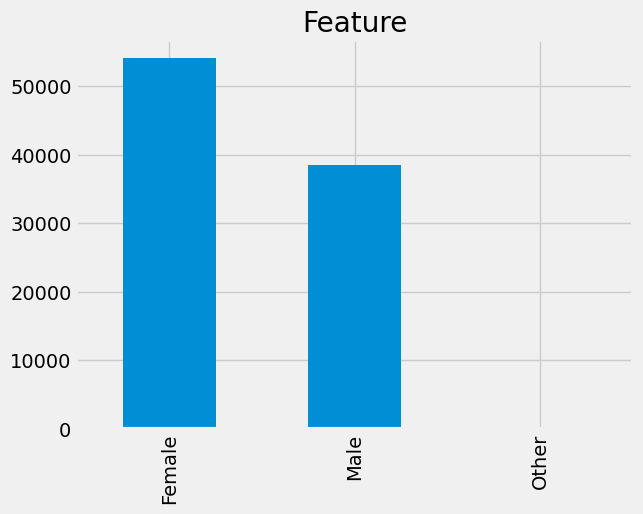

In [24]:
count.plot(kind='bar', title='Feature')

In [25]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah sample': count, 'Persentasi':percent.round(1)})
print(df)

   Jumlah sample  Persentasi
0          85876        92.8
1           6666         7.2


In [26]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah sample': count, 'Persentasi':percent.round(1)})
print(df)

   Jumlah sample  Persentasi
0          89040        96.2
1           3502         3.8


In [27]:
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)

df = pd.DataFrame({'Jumlah sample': count, 'Persentasi':percent.round(1)})
print(df)

             Jumlah sample  Persentasi
never                32975        35.6
No Info              32218        34.8
current               8770         9.5
former                8701         9.4
not current           6066         6.6
ever                  3812         4.1


<Axes: title={'center': 'Feature'}>

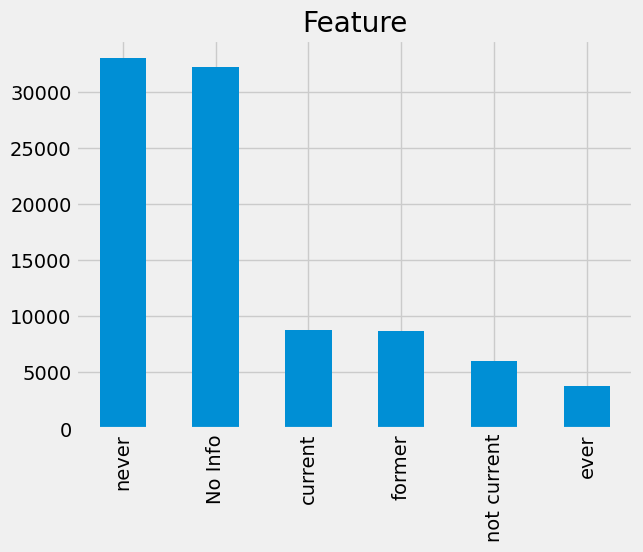

In [28]:
count.plot(kind='bar', title='Feature')

### Numerical Features

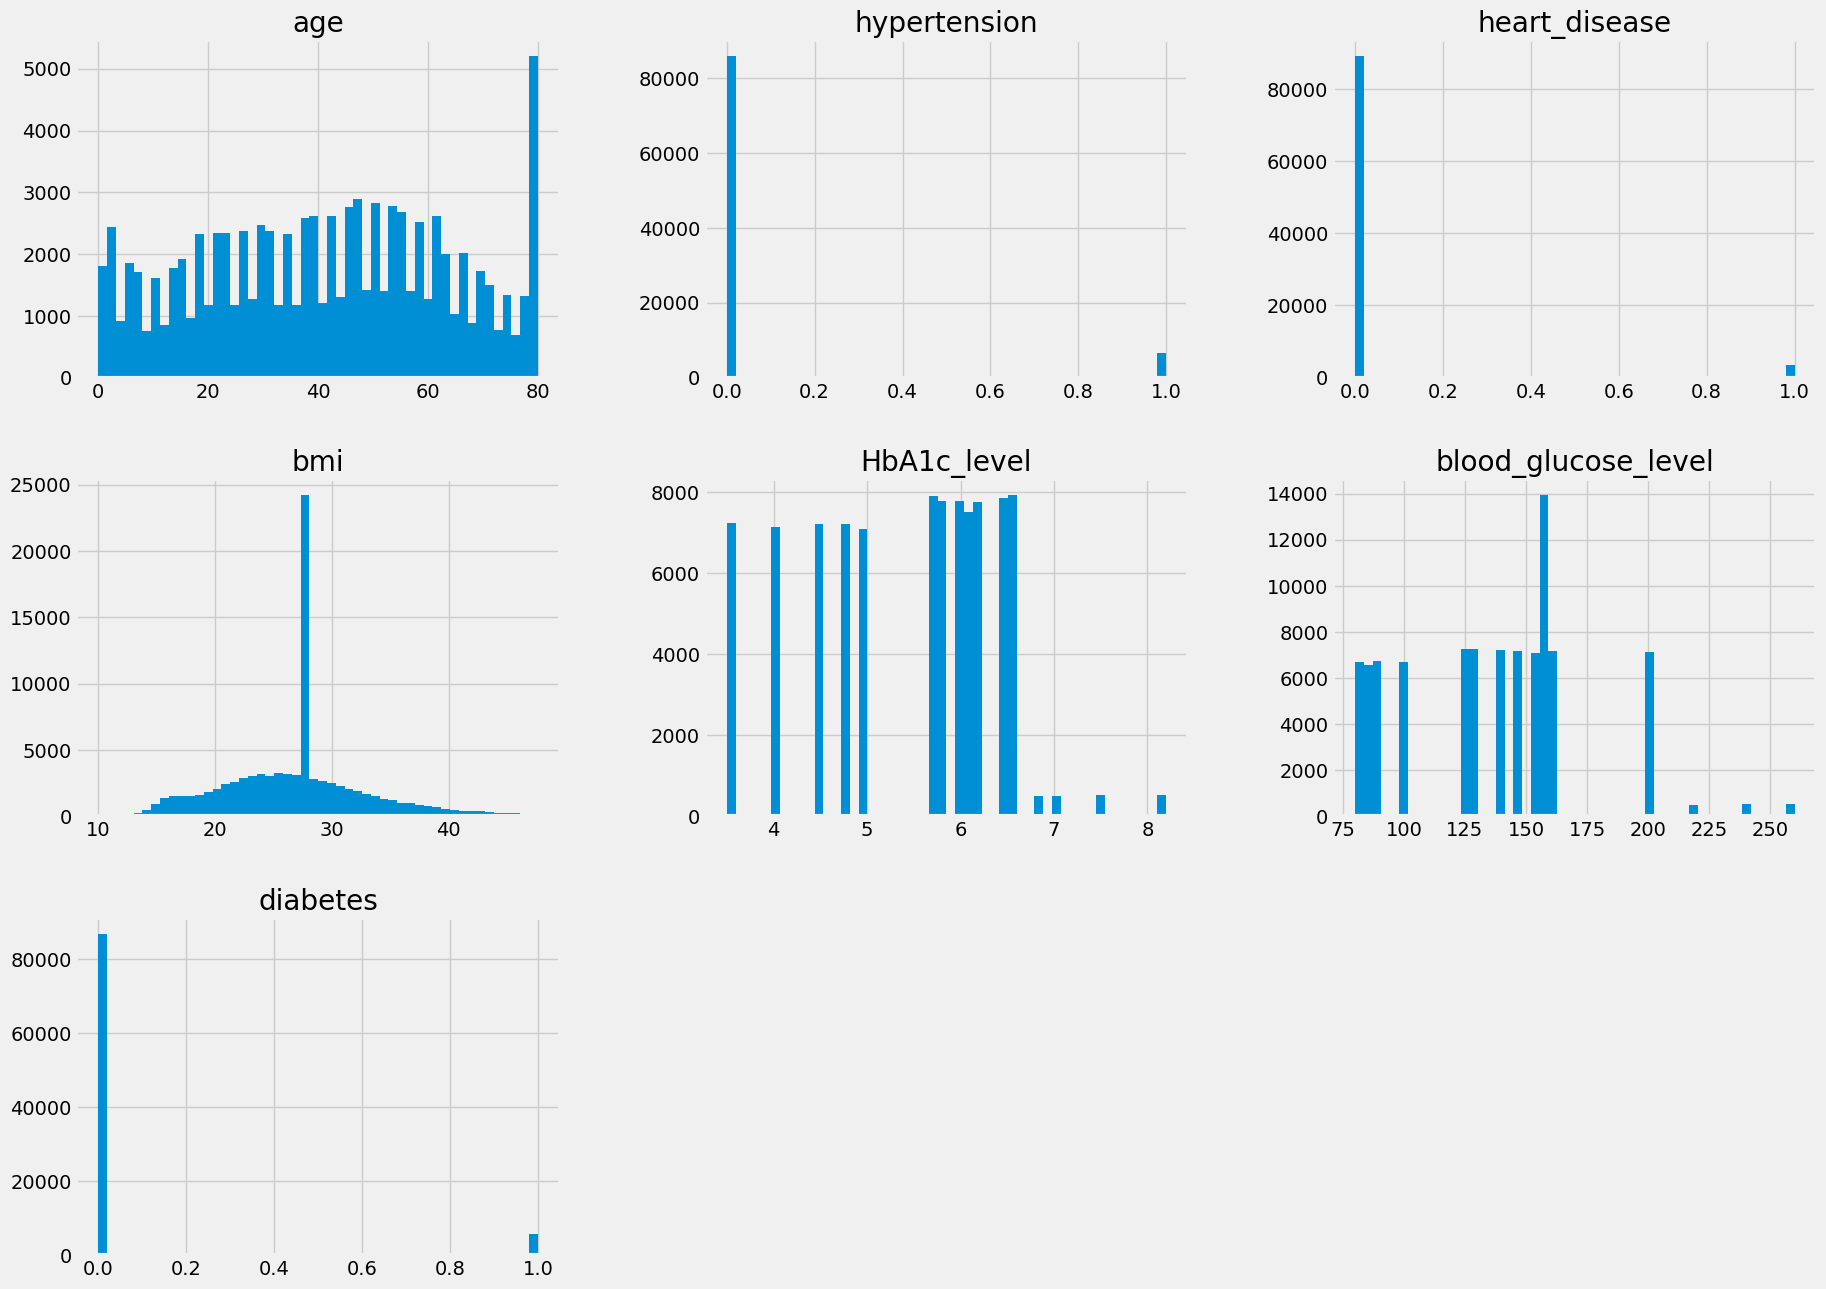

In [29]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Exploratory Data Analysis - Multivariate Analysis

### Categorical Features

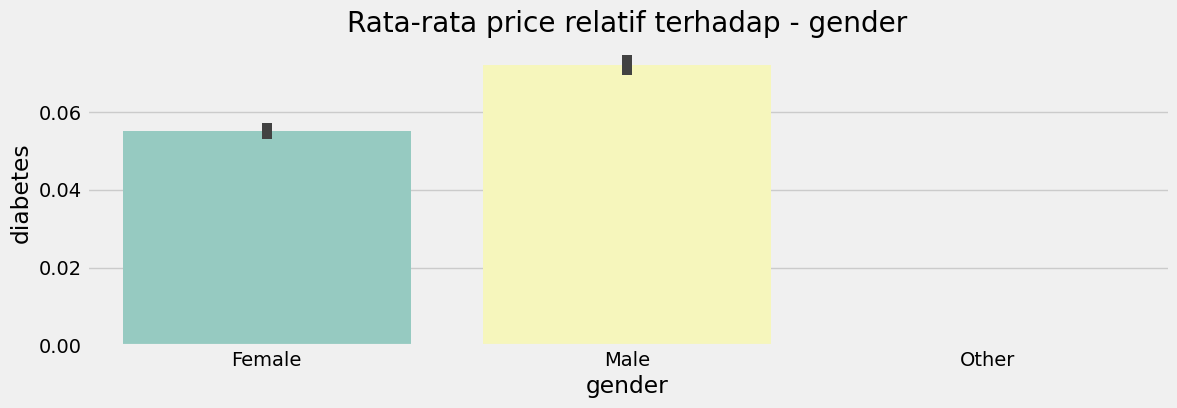

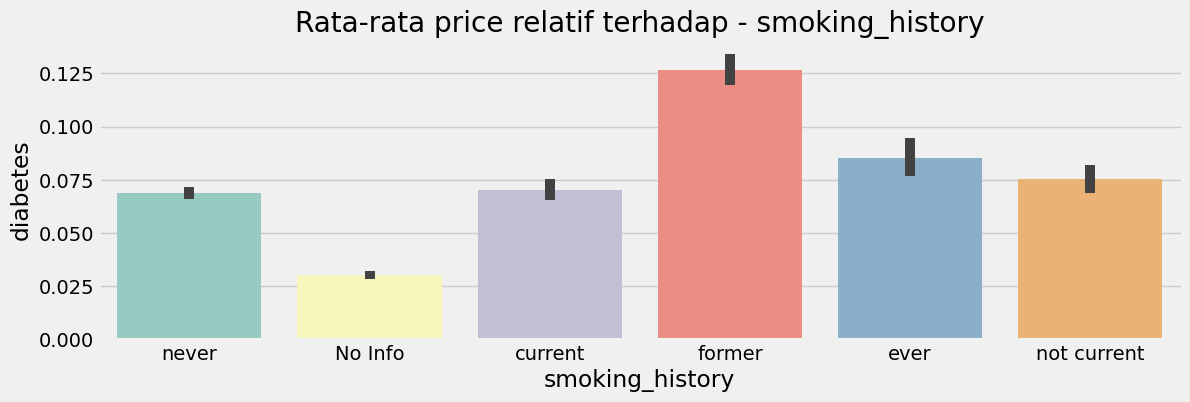

In [30]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='diabetes', kind='bar', dodge=False, height=4, aspect=3, data=data, palette='Set3')
  plt.title('Rata-rata price relatif terhadap - {}'.format(col))

### Numerical Features

<ipython-input-31-f78d960c5f2c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)


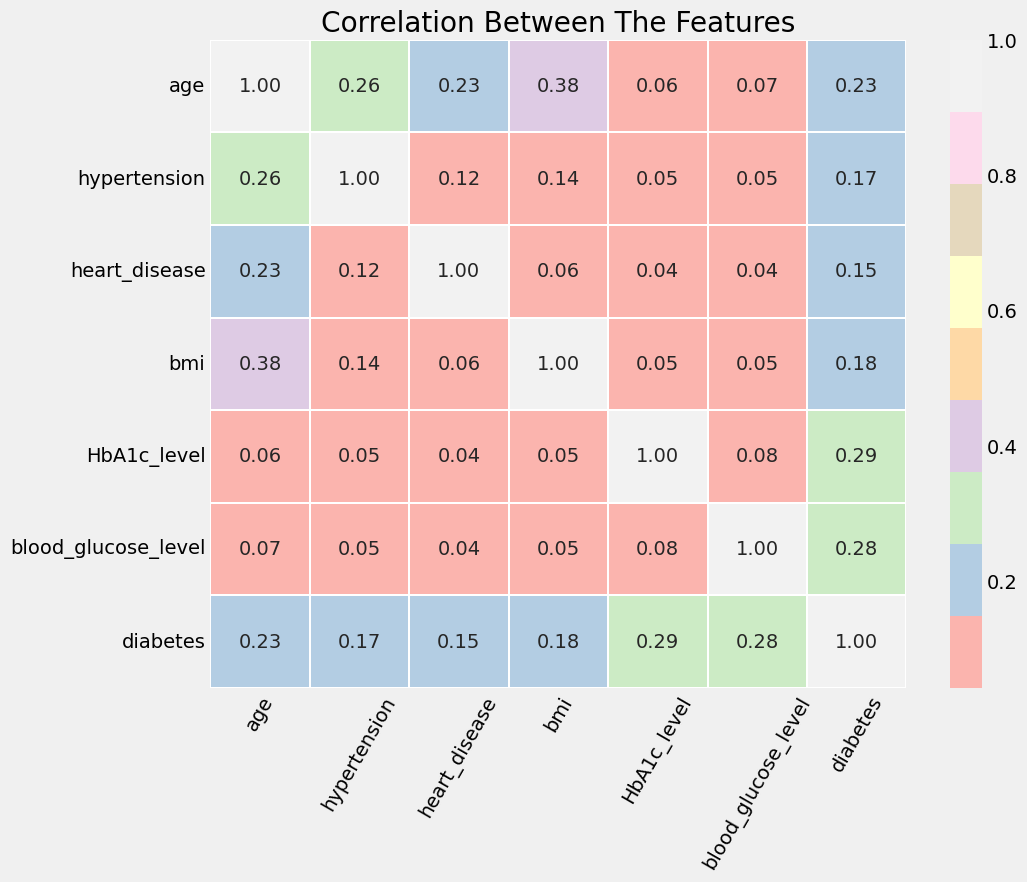

In [31]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

# **4. *Data Preparation***

### Encoding Fitur Kategori

In [32]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

In [33]:
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,
                                'not current': 6, 'ever': 7}, inplace=True)

In [34]:
data['gender'].replace({'Male': 2, 'Female': 3, 'Other': 3}, inplace=True)

### Train Test Split

In [35]:
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [36]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 92542
Total # of sample in train dataset: 83287
Total # of sample in test dataset: 9255


In [37]:
scaler = StandardScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [38]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-1.185701,-0.054301,-0.278626,-0.198654,1.920119,0.072790,-0.970700,0.645537
1,-1.185701,1.233948,-0.278626,-0.198654,1.920119,0.679367,1.130653,-1.247323
2,-1.185701,1.189525,-0.278626,-0.198654,-0.913236,0.919368,0.230074,-0.972995
3,-1.185701,1.233948,-0.278626,-0.198654,-0.204898,-0.482828,0.730396,0.124314
4,-1.185701,0.212234,-0.278626,-0.198654,-0.204898,-0.038991,0.530267,0.124314


In [39]:
X_train.describe().round(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
count,83287.0000,83287.0000,83287.0000,83287.0000,83287.0000,83287.0000,83287.0000,83287.0000
mean,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.1857,-1.8276,-0.2786,-0.1987,-0.9132,-2.7727,-1.9713,-1.5217
25%,-1.1857,-0.8095,-0.2786,-0.1987,-0.9132,-0.6078,-0.6705,-0.9730
50%,0.8434,0.0345,-0.2786,-0.1987,-0.2049,0.0728,0.3301,0.1243
75%,0.8434,0.7897,-0.2786,-0.1987,0.5034,0.4147,0.7304,0.6181
max,0.8434,1.7226,3.5890,5.0339,2.6285,3.4098,2.7317,3.4162


# **5. *Model Development***

In [40]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                mean_squared_error(y_test, y_pred)],
                          index=['Accuracy','Precision','Recall','F1-score', 'mse'],
                          columns = [model_name])
    return result

In [41]:
models = pd.DataFrame(
    index   = ['train_mse', 'test_mse'],
    columns = ['KNN', 'RandomForest', 'DecisionTree']
)

## KNeighbors

In [42]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [43]:
y_pred = knn.predict(X_test)

In [44]:
knn_result = metrics_calculator(y_test, y_pred, 'KNN')
knn_result

,KNN
Accuracy,0.958509
Precision,0.950201
Recall,0.696673
F1-score,0.767409
mse,0.041491


In [45]:
models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

## Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

In [47]:
y_pred = rf.predict(X_test)

rf_result = metrics_calculator(y_test, y_pred, 'Random Forest')
rf_result

,Random Forest
Accuracy,0.967585
Precision,0.974227
Recall,0.758669
F1-score,0.830522
mse,0.032415


## Decision Tree

In [48]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9)
dt.fit(X_train, y_train)

models.loc['train_mse', 'DecisionTree'] = mean_squared_error(y_pred=dt.predict(X_train), y_true=y_train)

In [49]:
y_pred = dt.predict(X_test)

dt_result = metrics_calculator(y_test, y_pred, 'Decesion Tree')
dt_result

,Decesion Tree
Accuracy,0.967801
Precision,0.974393
Recall,0.760309
F1-score,0.831994
mse,0.032199


# **5. *Evaluation***

In [50]:
evaluation_all = pd.concat([dt_result, knn_result, rf_result], axis=1)
evaluation_all

,Decesion Tree,KNN,Random Forest
Accuracy,0.967801,0.958509,0.967585
Precision,0.974393,0.950201,0.974227
Recall,0.760309,0.696673,0.758669
F1-score,0.831994,0.767409,0.830522
mse,0.032199,0.041491,0.032415


In [51]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'DecisionTree'])

model_dict = {'KNN': knn, 'RandomForest': rf, 'DecisionTree': dt}


for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000036,0.000041
RandomForest,0.000022,0.000032
DecisionTree,0.000028,0.000032


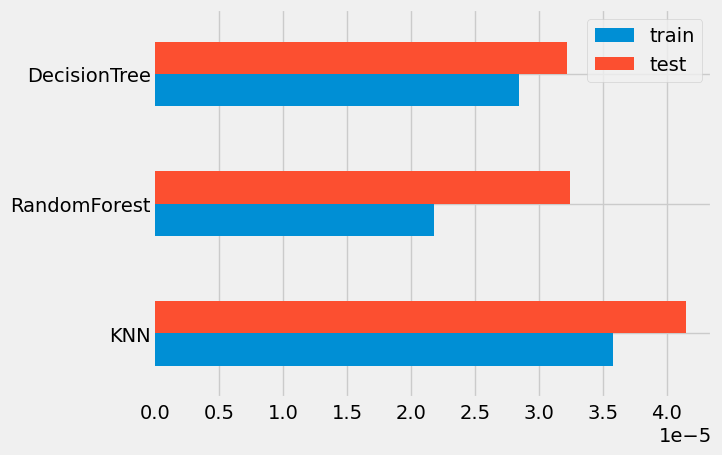

In [52]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)